## **1. Setup**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## **2. Load Data**

In [2]:
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")
test_df = pd.read_csv("test_df.csv")

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
X_train, y_train = train_df.iloc[:,:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X_val, y_val = val_df.iloc[:,:-1].to_numpy(), val_df.iloc[:,-1].to_numpy()
X_test, y_test = test_df.iloc[:,:-1].to_numpy(), test_df.iloc[:,-1].to_numpy()

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## **3. Unsupervised Machine Learning**

Earlier, we discussed how to implement supervised machine learning models, where the models learn through instruction. At times, we will not have labels to guide the learning process. In this scenario, Unsupervised Learning is the way to go, where the models learn some pattern from the input data. A very famous application of this technique is anomaly detection. We will explore this topic for the selected case study.

**Types of Unsupervised Learning in machine learning**

*   Unsupervised Transformations: This method is widely used when we have a high dimensional data as it generates a feature space that makes the problem easier to understand.
*   Clustering Algorithms: As the name suggests, this algorithm divides the input data into clusters.

Can you think of any difficulties with this setting?





### **3.1 Principal Component Analysis**

PCA generates a set of uncorelated principal components that account for the maximum variance in the data. This method is employed for dimensionality reduction.



#### **3.1.1 Mathematical Overview**
**Overview of SVD:**

Let's say $ X $ is our feature matrix where the each column represent a vibration signal. Usually, we have them in rows when we construct our data. But for understanding this technique, we will transpose it. So, $ X $ will have a shape of $p \times N$ where p represents the number of features and N represent the number of samples.

We can construct the SVD problem as follows: $X = UDV^T$.

Note: $U$ (left-singular vectors) is a $p\times N$ matrix , $D $ (singular values) is a $N\times N$ matrix, and $V$ (right singular vectors) is a $N\times N$ matrix. $U$ and $V$ are orthogonal (i.e., $UU^T$ and $VV^T$ are identity matrices). The vectors are arranged in descending order by importance.

To understand what $U$, $D$, and $V$ are we will have to look at $X^TX$, which is a correlation matrix where large values suggest similarity between samples and low values suggest dissimilarity.

Let's try working on these matrix to get $U, V, D$

$X^TX = VDU^TUDV^T = VD^2V^T$

$X^TXV = VD^2$, where $D^2$ are the eigenvalues and $V$ is the eigenvectors of this correlation matrix.

Similarly, $XX^T = UDV^TVDU^T = UD^2U^T$

$XX^TU = UD^2$

This is an inefficient way of calculating them, but it gives us an easy explanation. If we want to select the the first few components, we can filter them based on the eigenvalues, and this is how we get the decomposed version of our original high-dimensional matrix.

Note: This is most effective when the feature dimension exceeds the number of samples, which is not the case in our study with time-domain features. However, it still is an excellent way of reducing the dimension of our feature space, and we will analyze it in the later sections.




#### **3.1.2 PCA Implementation and Variance**

In [5]:
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator

Original shape: (8184, 18)
Reduced shape: (8184, 18)


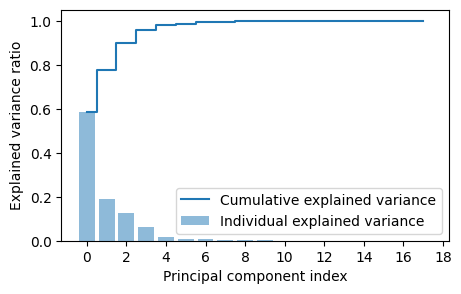

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

ax = plt.figure(figsize=(5,3)).gca()
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
ax.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
ax.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal component index')
ax.legend(loc='best')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

#### **3.1.3 PCA with two components**

Original shape: (8184, 18)
Reduced shape: (8184, 2)


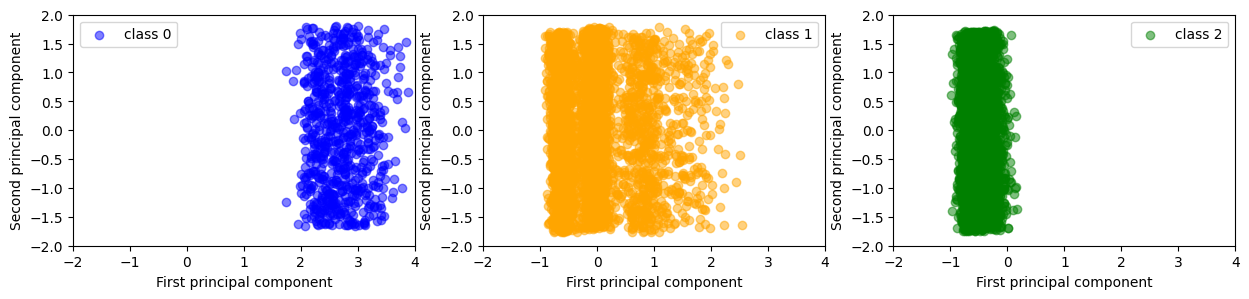

In [7]:
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X_train_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


clr = ['b', 'orange', 'g']
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for class_value, ax in zip(range(3),axes):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    # create scatter of these samples

    ax.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1], c=clr[class_value],
                alpha=0.5, label='class {}'.format(class_value))
    ax.legend()
    ax.set_xlabel('First principal component')
    ax.set_ylabel('Second principal component')
    ax.set_xlim([-2,4])
    ax.set_ylim([-2,2])



#### **3.1.4 PCA with three components**

Original shape: (8184, 18)
Reduced shape: (8184, 3)


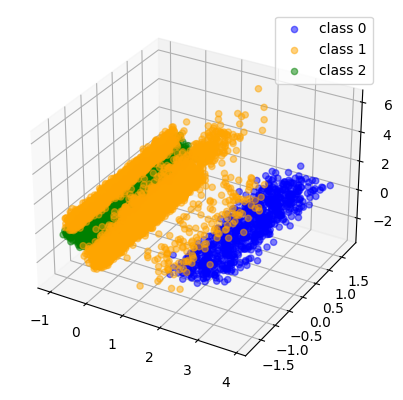

In [8]:
pca = PCA(n_components=3, whiten=True)
X_pca = pca.fit_transform(X_train_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
clr = ['b', 'orange', 'g']
for class_value in range(3):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    # create scatter of these samples

    ax.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1],  X_pca[row_ix, 2], c=clr[class_value],
                alpha=0.5, label='class {}'.format(class_value))
plt.legend()
plt.show()

#### **3.1.5 PCA with time series data**

In [ ]:
!pip install wget
!wget -O FD-A.zip https://figshare.com/ndownloader/articles/19930205/versions/1
!unzip  FD-A.zip -d /content/FD-A
import torch

--2023-07-18 19:12:47--  https://figshare.com/ndownloader/articles/19930205/versions/1
Resolving figshare.com (figshare.com)... 34.242.105.80, 34.250.148.102, 2a05:d018:1f4:d003:79cf:885b:b37:36e9, ...
Connecting to figshare.com (figshare.com)|34.242.105.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 964815105 (920M) [application/zip]
Saving to: ‘FD-A.zip’

FD-A.zip            100%[===================>] 920.12M  20.4MB/s    in 47s     

2023-07-18 19:13:35 (19.7 MB/s) - ‘FD-A.zip’ saved [964815105/964815105]

Archive:  FD-A.zip
replace /content/FD-A/test.pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_temp = torch.load("/content/FD-A/train.pt")
test_temp = torch.load("/content/FD-A/test.pt")
val_temp = torch.load("/content/FD-A/val.pt")

In [ ]:
ytrain_ts = train_temp['labels'].detach().cpu().numpy()
xtrain_ts = np.squeeze(train_temp['samples'], axis=1)

scaler = MinMaxScaler()
X_train_ts = scaler.fit_transform(xtrain_ts)


In [ ]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_train_ts)
print("Original shape: {}".format(str(X_train_ts.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
ax = plt.figure(figsize=(5,3)).gca()
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
ax.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
ax.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal component index')
ax.legend(loc='best')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X_train_ts)
print("Original shape: {}".format(str(X_train_ts.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


fig = plt.figure(figsize=(5,5))
clr = ['b', 'orange', 'g']
ct = 0
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for class_value, ax in zip(range(3),axes):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    # create scatter of these samples

    ax.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1], c=clr[class_value],
                alpha=0.5, label='class {}'.format(class_value))
    ax.legend()
    ax.set_xlabel('First principal component')
    if ct==0:
      ax.set_ylabel('Second principal component')
      ct += 1
    ax.set_xlim([-1.5,3.5])
    ax.set_ylim([-10,9])



In [ ]:
pca = PCA(n_components=3, whiten=True)
X_pca = pca.fit_transform(X_train_ts)
print("Original shape: {}".format(str(X_train_ts.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
clr = ['b', 'orange', 'g']
for class_value in range(3):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    # create scatter of these samples
    ax.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1],  X_pca[row_ix, 2], c=clr[class_value],
                alpha=0.5, label='class {}'.format(class_value))
plt.legend()
plt.show()